In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from scipy.cluster import hierarchy
import networkx as nx

In [3]:
from sqlite3 import connect

In [4]:
conn = connect('../../my-trifles/Extensions/db-bio-taxa.db')
taxa = pd.read_sql('select * from species', conn)
taxa.head()

OperationalError: unable to open database file

In [ ]:
meta = taxa.query("parent == 1 or parent == 131567")
meta

,taxid,parent,spname,common,rank,track
1,10239,1,Viruses,,superkingdom,"10239,1"
2,131567,1,cellular organisms,,no rank,"131567,1"
3,2787823,1,unclassified entries,,no rank,"2787823,1"
4,2787854,1,other entries,,no rank,"2787854,1"
39,2,131567,Bacteria,eubacteria,superkingdom,"2,131567,1"
40,2157,131567,Archaea,,superkingdom,"2157,131567,1"
41,2759,131567,Eukaryota,eucaryotes,superkingdom,"2759,131567,1"


In [ ]:
cells = taxa[taxa.track.str.contains('131567')]
cells

,taxid,parent,spname,common,rank,track
2,131567,1,cellular organisms,,no rank,"131567,1"
39,2,131567,Bacteria,eubacteria,superkingdom,"2,131567,1"
40,2157,131567,Archaea,,superkingdom,"2157,131567,1"
41,2759,131567,Eukaryota,eucaryotes,superkingdom,"2759,131567,1"
2369,1224,2,Proteobacteria,,phylum,"1224,2,131567,1"
...,...,...,...,...,...,...
2345960,368082,2630923,Cyprinodon sp. US-2006,,species,"368082,2630923,28741,136838,136836,8076,8087,2..."
2345961,722606,2624860,Floridichthys sp. 1 MVM-2009,,species,"722606,2624860,30741,136838,136836,8076,8087,2..."
2345962,327764,95543,Tropheops tropheops gracilior,,subspecies,"327764,95543,1905357,702376,319058,318546,3190..."
2345963,327765,95543,Tropheops tropheops tropheops,,subspecies,"327765,95543,1905357,702376,319058,318546,3190..."


## Bacteria

In [ ]:
bacteria = cells[cells.track.str.contains('2,131567,1')].sort_values('taxid')
bacteria

,taxid,parent,spname,common,rank,track
39,2,131567,Bacteria,eubacteria,superkingdom,"2,131567,1"
128742,6,335928,Azorhizobium,,genus,"6,335928,356,28211,1224,2,131567,1"
154680,7,6,Azorhizobium caulinodans,,species,"7,6,335928,356,28211,1224,2,131567,1"
148105,9,32199,Buchnera aphidicola,,species,"9,32199,1903409,91347,1236,1224,2,131567,1"
128072,10,1706371,Cellvibrio,,genus,"10,1706371,1706369,1236,1224,2,131567,1"
...,...,...,...,...,...,...
485083,2860197,185979,Bacillus sp. MCCB 382,,species,"2860197,185979,1386,186817,1385,91061,1239,178..."
128043,2860205,712,Canicola,,genus,"2860205,712,135625,1236,1224,2,131567,1"
129792,2860235,2820280,Glacieibacterium,,genus,"2860235,2820280,204457,28211,1224,2,131567,1"
163495,2860291,213422,Geomesophilobacter,,genus,"2860291,213422,69541,28221,68525,1224,2,131567,1"


In [ ]:
rank_sort = bacteria[['taxid',
                      'rank']].groupby('rank').agg('count').sort_values(
                          by='taxid', ascending=False)
rank_sort

,taxid
rank,
species,465740
strain,40936
no rank,9247
genus,4463
family,637
subspecies,633
forma specialis,522
isolate,503
order,253


In [ ]:
len(rank_sort)

27

In [ ]:
df = pd.DataFrame(columns=rank_sort.index.values)
df.head()

,species,strain,no rank,genus,family,subspecies,forma specialis,isolate,order,serotype,...,suborder,biotype,pathogroup,subclass,forma,tribe,subfamily,subgenus,subphylum,superkingdom


In [ ]:
bacteria.query('parent == 1385').query('rank == "family"')

,taxid,parent,spname,common,rank,track
136021,90964,1385,Staphylococcaceae,,family,"90964,1385,91061,1239,1783272,2,131567,1"
136022,186817,1385,Bacillaceae,,family,"186817,1385,91061,1239,1783272,2,131567,1"
136023,186818,1385,Planococcaceae,,family,"186818,1385,91061,1239,1783272,2,131567,1"
136024,186820,1385,Listeriaceae,,family,"186820,1385,91061,1239,1783272,2,131567,1"
136025,186821,1385,Sporolactobacillaceae,,family,"186821,1385,91061,1239,1783272,2,131567,1"
136026,186822,1385,Paenibacillaceae,,family,"186822,1385,91061,1239,1783272,2,131567,1"
136027,186823,1385,Alicyclobacillaceae,,family,"186823,1385,91061,1239,1783272,2,131567,1"
136028,186824,1385,Thermoactinomycetaceae,,family,"186824,1385,91061,1239,1783272,2,131567,1"
136029,538998,1385,Pasteuriaceae,,family,"538998,1385,91061,1239,1783272,2,131567,1"


In [ ]:
bacteria.query('parent == 91347').query('rank == "family"')

,taxid,parent,spname,common,rank,track
96859,543,91347,Enterobacteriaceae,,family,"543,91347,1236,1224,2,131567,1"
96863,1771359,91347,Thorselliaceae,,family,"1771359,91347,1236,1224,2,131567,1"
96864,1903409,91347,Erwiniaceae,,family,"1903409,91347,1236,1224,2,131567,1"
96865,1903410,91347,Pectobacteriaceae,,family,"1903410,91347,1236,1224,2,131567,1"
96866,1903411,91347,Yersiniaceae,,family,"1903411,91347,1236,1224,2,131567,1"
96867,1903412,91347,Hafniaceae,,family,"1903412,91347,1236,1224,2,131567,1"
96868,1903414,91347,Morganellaceae,,family,"1903414,91347,1236,1224,2,131567,1"
96869,1903416,91347,Budviciaceae,,family,"1903416,91347,1236,1224,2,131567,1"
96870,2812006,91347,Bruguierivoracaceae,,family,"2812006,91347,1236,1224,2,131567,1"


In [ ]:
bacteria.query('parent == 72274').query('rank == "family"')

,taxid,parent,spname,common,rank,track
96853,468,72274,Moraxellaceae,,family,"468,72274,1236,1224,2,131567,1"
96856,135621,72274,Pseudomonadaceae,,family,"135621,72274,1236,1224,2,131567,1"
96858,1827282,72274,Ventosimonadaceae,,family,"1827282,72274,1236,1224,2,131567,1"


In [ ]:
sp_list = [
    'Bacillus subtilis', 'Escherichia coli', 'Pseudomonas aeruginosa',
    'Staphylococcus epidermidis', 'Enterococcus faecalis'
]

for ind, sp in enumerate(sp_list):
    species = bacteria.query(f"spname == '{sp}'")

    tracks = species.track.str.split(',').values[0]

    for _id in tracks:
        taxon = bacteria.query(f"taxid == {_id}")
        df.loc[ind, taxon['rank'].values] = taxon['spname'].values

df_new = df.dropna(axis=1)
df_new

,species,genus,family,order,phylum,class,superkingdom
0,Bacillus subtilis,Bacillus,Bacillaceae,Bacillales,Firmicutes,Bacilli,Bacteria
1,Escherichia coli,Escherichia,Enterobacteriaceae,Enterobacterales,Proteobacteria,Gammaproteobacteria,Bacteria
2,Pseudomonas aeruginosa,Pseudomonas,Pseudomonadaceae,Pseudomonadales,Proteobacteria,Gammaproteobacteria,Bacteria
3,Staphylococcus epidermidis,Staphylococcus,Staphylococcaceae,Bacillales,Firmicutes,Bacilli,Bacteria
4,Enterococcus faecalis,Enterococcus,Enterococcaceae,Lactobacillales,Firmicutes,Bacilli,Bacteria


In [ ]:
sp_list = [
    'Bacillus subtilis', 'Escherichia coli', 'Pseudomonas aeruginosa',
    'Staphylococcus epidermidis', 'Listeria monocytogenes',
    'Micrococcus luteus'
]

for ind, sp in enumerate(sp_list):
    species = bacteria.query(f"spname == '{sp}'")

    tracks = species.track.str.split(',').values[0]

    for _id in tracks:
        taxon = bacteria.query(f"taxid == {_id}")
        df.loc[ind, taxon['rank'].values] = taxon['taxid'].values

df_new_id = df.dropna(axis=1)
df_new_id = df_new_id.copy()
df_new_id['species'] = sp_list
df_new_id

,species,genus,family,order,phylum,class,superkingdom
0,Bacillus subtilis,1386,186817,1385,1239,91061,2
1,Escherichia coli,561,543,91347,1224,1236,2
2,Pseudomonas aeruginosa,286,135621,72274,1224,1236,2
3,Staphylococcus epidermidis,1279,90964,1385,1239,91061,2
4,Listeria monocytogenes,1637,186820,1385,1239,91061,2
5,Micrococcus luteus,1269,1268,85006,201174,1760,2


In [ ]:
df_new_id.columns[:-1]

Index(['species', 'genus', 'family', 'order', 'phylum', 'class'], dtype='object')

## tree

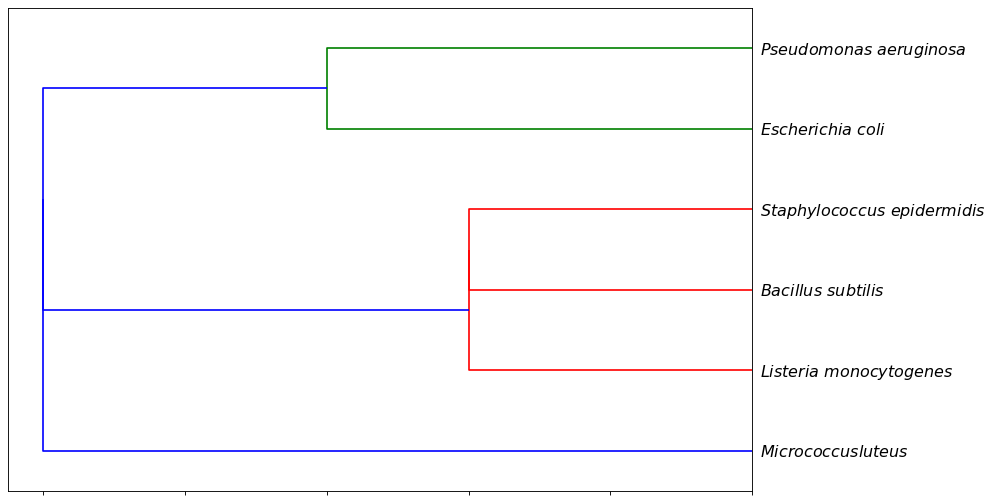

In [ ]:
sp_names = [
    '$Bacillus\ subtilis$', '$Escherichia\ coli$', '$Pseudomonas\ aeruginosa$',
    '$Staphylococcus\ epidermidis$', '$Listeria\ monocytogenes$',
    '$Micrococcus luteus$'
]

hierarchy.set_link_color_palette(['r', 'g'])

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

z = hierarchy.linkage(df_new_id[df_new_id.columns[1:-1]],
                      method='single',
                      metric='jaccard')

dend = hierarchy.dendrogram(z,
                            labels=sp_names,
                            leaf_font_size='x-large',
                            orientation='left',
                            above_threshold_color='blue')

ax.set(xlabel="", xticklabels="")
# plt.savefig('2.2-distance.svg')

## phylum

In [ ]:
caulo = bacteria.query(f"spname == 'Caulobacterales'")
caulo

,taxid,parent,spname,common,rank,track
69749,204458,28211,Caulobacterales,,order,"204458,28211,1224,2,131567,1"


In [ ]:
child_caulo = bacteria[bacteria.track.str.contains(f"{caulo.taxid.values[0]}")]
child_caulo

,taxid,parent,spname,common,rank,track
129794,20,76892,Phenylobacterium,,genus,"20,76892,204458,28211,1224,2,131567,1"
159096,21,20,Phenylobacterium immobile,,species,"21,20,76892,204458,28211,1224,2,131567,1"
129795,75,76892,Caulobacter,,genus,"75,76892,204458,28211,1224,2,131567,1"
334011,78,2648921,Caulobacter sp.,,species,"78,2648921,75,76892,204458,28211,1224,2,131567,1"
159134,293,41275,Brevundimonas diminuta,,species,"293,41275,76892,204458,28211,1224,2,131567,1"
...,...,...,...,...,...,...
105968,2822437,2044589,unclassified Candidatus Sabulitectum,,no rank,"2822437,2044589,1729712,1783270,2,131567,1"
136003,2822438,2822437,Candidatus Sabulitectum sp.,,species,"2822438,2822437,2044589,1729712,1783270,2,1315..."
334571,2823693,2648921,Caulobacter sp. S6,,species,"2823693,2648921,75,76892,204458,28211,1224,2,1..."
335907,2838843,2622653,Brevundimonas sp. TTT9,,species,"2838843,2622653,41275,76892,204458,28211,1224,..."


In [ ]:
child_caulo.query("rank == 'genus'")

,taxid,parent,spname,common,rank,track
129794,20,76892,Phenylobacterium,,genus,"20,76892,204458,28211,1224,2,131567,1"
129795,75,76892,Caulobacter,,genus,"75,76892,204458,28211,1224,2,131567,1"
129796,41275,76892,Brevundimonas,,genus,"41275,76892,204458,28211,1224,2,131567,1"
129797,76890,76892,Asticcacaulis,,genus,"76890,76892,204458,28211,1224,2,131567,1"
129800,267929,76892,Nitrobacteria,,genus,"267929,76892,204458,28211,1224,2,131567,1"
74499,2044589,1729712,Candidatus Sabulitectum,,genus,"2044589,1729712,1783270,2,131567,1"
129801,2052989,76892,Aquidulcibacter,,genus,"2052989,76892,204458,28211,1224,2,131567,1"
129802,2768684,76892,Terricaulis,,genus,"2768684,76892,204458,28211,1224,2,131567,1"


# Networks